In [4]:
pip install gymnasium-robotics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.1/26.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 19.5 MB/s eta 0:00:00


In [ ]:
# https://github.com/Farama-Foundation/Gymnasium-Robotics/blob/e73016b60c061192280e742998a244830a698889/gymnasium_robotics/envs/maze/ant_maze_v5.py#L74

In [9]:
import gymnasium as gym
import gymnasium_robotics
import numpy as np

# Gymnasium Robotics 環境の登録
gym.register_envs(gymnasium_robotics)

# AntMaze 環境を作成
#離散報酬
# env = gym.make("AntMaze_UMaze-v5", max_episode_steps=500)

#連続報酬
env = gym.make("AntMaze_UMazeDense-v5", max_episode_steps=500)

# カスタムAntMaze
example_map = [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 1],
               [1, 0, 1, 0, 1],
               [1, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]]

#小さい迷路
example_map = [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]]

env = gym.make("AntMaze_UMaze-v5", maze_map=example_map)

# 環境をリセットして初期状態を取得

options = {"goal_cell": [1, 3], "reset_cell": [1, 1]}
observation, info = env.reset(options=options)

print("Initial observation:", observation)
print("Initial info:", info)

# 環境パラメータ
# num_episodes = 5  # エピソード数
# max_steps_per_episode = 500  # 1エピソードあたりの最大ステップ数

num_episodes = 10  # エピソード数
max_steps_per_episode = 1000  # 1エピソードあたりの最大ステップ数

# 迷路探索
for episode in range(num_episodes):
    observation, info = env.reset()
    print(f"Episode {episode + 1} start.")
    for step in range(max_steps_per_episode):
        # ランダムなアクションを選択
        action = env.action_space.sample()

        # 環境で1ステップを実行
        observation, reward, terminated, truncated, info = env.step(action)

        # 観測と状態を表示
        print(f"Step {step + 1}:")
        print(f"  Action: {action}")
        print(f"  Observation: {observation}")
        print(f"  Reward: {reward}")
        print(f"  Terminated: {terminated}, Truncated: {truncated}")
        print(f"  Info: {info}")

        # 目標地点に到達したか確認
        if info.get("success", False):
            print(f"  Success! The agent reached the goal in {step + 1} steps.")
            break

        # 終了条件を満たしたらループを終了
        if terminated or truncated:
            print(f"  Episode ended after {step + 1} steps.")
            break

print("Exploration finished.")
env.close()

ストリーミング出力は最後の 5000 行に切り捨てられました。
Step 537:
  Action: [-0.40794888 -0.51970714 -0.46761397 -0.23379868 -0.38280496  0.36738715
 -0.85445374  0.55880183]
  Observation: {'observation': array([ 2.97647865e-01, -2.05989967e-01, -9.62971817e-01,  1.49678679e-01,
        8.85985686e-02, -5.24859986e-01,  4.80100497e-01, -5.42634212e-01,
       -5.12177816e-01,  1.28298550e-01, -7.48413618e-01, -8.00151756e-02,
        5.21696640e-01,  7.12827412e-01, -7.95928215e-01,  5.67208041e-01,
        1.08872324e+00, -1.59691044e+00,  2.32107918e+00, -5.97622642e-03,
        8.54279680e-01,  5.68372314e-01, -3.03822841e-01, -8.70126272e+00,
        8.76240799e+00, -7.65662462e+00,  1.15060929e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.0000000

In [5]:
import gymnasium as gym
import gymnasium_robotics
import numpy as np

# Gymnasium Robotics 環境の登録
gym.register_envs(gymnasium_robotics)

# AntMaze 環境を作成
# env = gym.make("AntMaze_UMaze-v5", max_episode_steps=500)

# カスタムAntMaze
example_map = [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 1],
               [1, 0, 1, 0, 1],
               [1, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]]

#離散報酬
env = gym.make("AntMaze_UMaze-v5", maze_map=example_map)

# #連続報酬
# env = gym.make("AntMaze_UMazeDense-v5", max_episode_steps=500)

# 環境をリセットして初期状態を取得
observation, info = env.reset()
print("Initial observation:", observation)
print("Initial info:", info)

# 環境パラメータ
# num_episodes = 5  # エピソード数
# max_steps_per_episode = 500  # 1エピソードあたりの最大ステップ数

num_episodes = 2  # エピソード数
max_steps_per_episode = 1  # 1エピソードあたりの最大ステップ数

# 迷路探索
for episode in range(num_episodes):
    observation, info = env.reset()
    print(f"Episode {episode + 1} start.")
    for step in range(max_steps_per_episode):
        # ランダムなアクションを選択
        action = env.action_space.sample()

        # 環境で1ステップを実行
        observation, reward, terminated, truncated, info = env.step(action)
        env.render()

        # 観測と状態を表示
        print(f"Step {step + 1}:")
        print(f"  Action: {action}")
        print(f"  Observation: {observation}")
        print(f"  Reward: {reward}")
        print(f"  Terminated: {terminated}, Truncated: {truncated}")
        print(f"  Info: {info}")

        # 目標地点に到達したか確認
        if info.get("success", False):
            print(f"  Success! The agent reached the goal in {step + 1} steps.")
            break

        # 終了条件を満たしたらループを終了
        if terminated or truncated:
            print(f"  Episode ended after {step + 1} steps.")
            break

print("Exploration finished.")
env.close()

Initial observation: {'observation': array([0.75, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]), 'achieved_goal': array([-4.97522428, -4.26904752]), 'desired_goal': array([ 4.42512893, -4.0084044 ])}
Initial info: {'x_position': -4.975224282838575, 'y_position': -4.269047521747081, 'distance_from_origin': 6.5557321030897455, 'success': False}
Episode 1 sta

AttributeError: Unexpected mode: None, expected modes: human, rgb_array, or depth_array

In [ ]:
# 参考

"""A maze environment with the Gymnasium Ant agent (https://github.com/Farama-Foundation/Gymnasium/blob/main/gymnasium/envs/mujoco/ant_v5.py).

The code is inspired by the D4RL repository hosted on GitHub (https://github.com/Farama-Foundation/D4RL), published in the paper
'D4RL: Datasets for Deep Data-Driven Reinforcement Learning' by Justin Fu, Aviral Kumar, Ofir Nachum, George Tucker, Sergey Levine.

Original Author of the code: Justin Fu

The modifications made involve reusing the code in Gymnasium for the Ant environment and in `point_maze/maze_env.py`.
The new code also follows the Gymnasium API and Multi-goal API

This project is covered by the Apache 2.0 License.
"""

import sys
from os import path
from typing import Dict, List, Optional, Union

import numpy as np
from gymnasium import spaces
from gymnasium.envs.mujoco.ant_v5 import AntEnv
from gymnasium.utils.ezpickle import EzPickle

from gymnasium_robotics.envs.maze.maps import U_MAZE
from gymnasium_robotics.envs.maze.maze_v4 import MazeEnv
from gymnasium_robotics.utils.mujoco_utils import MujocoModelNames


class AntMazeEnv(MazeEnv, EzPickle):
    """
    ### Description

    This environment was refactored from the [D4RL](https://github.com/Farama-Foundation/D4RL) repository, introduced by Justin Fu, Aviral Kumar, Ofir Nachum, George Tucker, and Sergey Levine
    in ["D4RL: Datasets for Deep Data-Driven Reinforcement Learning"](https://arxiv.org/abs/2004.07219).

    The tasks found in the `AntMaze` environments are the same as the ones in the `PointMaze` environments. However, in this case the agent is the Ant quadruped from the main [Gymnaisum](https://gymnasium.farama.org/environments/mujoco/ant/) repository.
    The control frequency of the ant is of `f = 20 Hz`. Each simulation timestep is of `dt=0.01` and the ant robot repeats the same action for 5 simulation steps.

    ### Maze Variations

    #### Maze size
    The map variations for the mazes are the same as for `PointMaze`. The ant environments with fixed goal and reset locations are the following:

    * `AntMaze_UMaze-v5`
    * `AntMaze_BigMaze-v5`
    * `AntMaze_HardestMaze-v5`

    #### Diverse goal mazes
    The environments with fixed reset position for the ant and randomly selected goals, also known as diverse goal, are:

    * `AntMaze_BigMaze_DG-v5`
    * `AntMaze_HardestMaze_DG-v5`

    #### Diverse goal and reset mazes

    Finally, the environments that select the reset and goal locations randomly are:

    * `AntMaze_BigMaze_DGR-v5`
    * `AntMaze_HardestMaze_DGR-v5`

    #### Custom maze
    Also, any of the `AntMaze` environments can be initialized with a custom maze map by setting the `maze_map` argument like follows:

    ```python
    import gymnasium as gym
    import gymnasium_robotics

    gym.register_envs(gymnasium_robotics)

    example_map = [[1, 1, 1, 1, 1],
           [1, C, 0, C, 1],
           [1, 1, 1, 1, 1]]

    env = gym.make('AntMaze_UMaze-v5', maze_map=example_map)
    ```

    ### Action Space
    The action space is the action space of [Gymnasium/MuJoCo/Ant](https://gymnasium.farama.org/environments/mujoco/ant/#action-space):

    The action space is a `Box(-1, 1, (8,), float32)`. An action represents the torques applied at the hinge joints.

    | Num | Action                                                            | Control Min | Control Max | Name (in corresponding XML file) | Joint | Type (Unit)  |
    | --- | ----------------------------------------------------------------- | ----------- | ----------- | -------------------------------- | ----- | ------------ |
    | 0   | Torque applied on the rotor between the torso and back right hip  | -1          | 1           | hip_4 (right_back_leg)           | hinge | torque (N m) |
    | 1   | Torque applied on the rotor between the back right two links      | -1          | 1           | angle_4 (right_back_leg)         | hinge | torque (N m) |
    | 2   | Torque applied on the rotor between the torso and front left hip  | -1          | 1           | hip_1 (front_left_leg)           | hinge | torque (N m) |
    | 3   | Torque applied on the rotor between the front left two links      | -1          | 1           | angle_1 (front_left_leg)         | hinge | torque (N m) |
    | 4   | Torque applied on the rotor between the torso and front right hip | -1          | 1           | hip_2 (front_right_leg)          | hinge | torque (N m) |
    | 5   | Torque applied on the rotor between the front right two links     | -1          | 1           | angle_2 (front_right_leg)        | hinge | torque (N m) |
    | 6   | Torque applied on the rotor between the torso and back left hip   | -1          | 1           | hip_3 (back_leg)                 | hinge | torque (N m) |
    | 7   | Torque applied on the rotor between the back left two links       | -1          | 1           | angle_3 (back_leg)               | hinge | torque (N m) |

    ### Observation Space
    The observation is a `goal-aware observation space`. It consists of a dictionary with information about the robot's position and goal. The dictionary consists of the following 3 keys:

    * `observation`: Observations consist of positional values of different body parts of the ant, followed by the velocities of those individual parts (their derivatives) with all
        the positions ordered before all the velocities.

        By default, observations do not include the x- and y-coordinates of the ant's torso. These values are included in the `achieved_goal` key of the observation.
        However, by default, an observation is a `ndarray` with shape `(111,)` if the external contact forces are included with the `use_contact_forces` arguments. Otherwise, the shape will be `(27, )`
        The elements of the array correspond to the following:

        | Num | Observation                                                  | Min    | Max    | Name (in corresponding XML file)       | Joint | Unit                     |
        |-----|--------------------------------------------------------------|--------|--------|----------------------------------------|-------|--------------------------|
        | 0   | z-coordinate of the torso (centre)                           | -Inf   | Inf    | torso                                  | free  | position (m)             |
        | 1   | x-orientation of the torso (centre)                          | -Inf   | Inf    | torso                                  | free  | angle (rad)              |
        | 2   | y-orientation of the torso (centre)                          | -Inf   | Inf    | torso                                  | free  | angle (rad)              |
        | 3   | z-orientation of the torso (centre)                          | -Inf   | Inf    | torso                                  | free  | angle (rad)              |
        | 4   | w-orientation of the torso (centre)                          | -Inf   | Inf    | torso                                  | free  | angle (rad)              |
        | 5   | angle between torso and first link on front left             | -Inf   | Inf    | hip_1 (front_left_leg)                 | hinge | angle (rad)              |
        | 6   | angle between the two links on the front left                | -Inf   | Inf    | ankle_1 (front_left_leg)               | hinge | angle (rad)              |
        | 7   | angle between torso and first link on front right            | -Inf   | Inf    | hip_2 (front_right_leg)                | hinge | angle (rad)              |
        | 8   | angle between the two links on the front right               | -Inf   | Inf    | ankle_2 (front_right_leg)              | hinge | angle (rad)              |
        | 9   | angle between torso and first link on back left              | -Inf   | Inf    | hip_3 (back_leg)                       | hinge | angle (rad)              |
        | 10  | angle between the two links on the back left                 | -Inf   | Inf    | ankle_3 (back_leg)                     | hinge | angle (rad)              |
        | 11  | angle between torso and first link on back right             | -Inf   | Inf    | hip_4 (right_back_leg)                 | hinge | angle (rad)              |
        | 12  | angle between the two links on the back right                | -Inf   | Inf    | ankle_4 (right_back_leg)               | hinge | angle (rad)              |
        | 13  | x-coordinate velocity of the torso                           | -Inf   | Inf    | torso                                  | free  | velocity (m/s)           |
        | 14  | y-coordinate velocity of the torso                           | -Inf   | Inf    | torso                                  | free  | velocity (m/s)           |
        | 15  | z-coordinate velocity of the torso                           | -Inf   | Inf    | torso                                  | free  | velocity (m/s)           |
        | 16  | x-coordinate angular velocity of the torso                   | -Inf   | Inf    | torso                                  | free  | angular velocity (rad/s) |
        | 17  | y-coordinate angular velocity of the torso                   | -Inf   | Inf    | torso                                  | free  | angular velocity (rad/s) |
        | 18  | z-coordinate angular velocity of the torso                   | -Inf   | Inf    | torso                                  | free  | angular velocity (rad/s) |
        | 19  | angular velocity of angle between torso and front left link  | -Inf   | Inf    | hip_1 (front_left_leg)                 | hinge | angle (rad)              |
        | 20  | angular velocity of the angle between front left links       | -Inf   | Inf    | ankle_1 (front_left_leg)               | hinge | angle (rad)              |
        | 21  | angular velocity of angle between torso and front right link | -Inf   | Inf    | hip_2 (front_right_leg)                | hinge | angle (rad)              |
        | 22  | angular velocity of the angle between front right links      | -Inf   | Inf    | ankle_2 (front_right_leg)              | hinge | angle (rad)              |
        | 23  | angular velocity of angle between torso and back left link   | -Inf   | Inf    | hip_3 (back_leg)                       | hinge | angle (rad)              |
        | 24  | angular velocity of the angle between back left links        | -Inf   | Inf    | ankle_3 (back_leg)                     | hinge | angle (rad)              |
        | 25  | angular velocity of angle between torso and back right link  | -Inf   | Inf    | hip_4 (right_back_leg)                 | hinge | angle (rad)              |
        | 26  |angular velocity of the angle between back right links        | -Inf   | Inf    | ankle_4 (right_back_leg)               | hinge | angle (rad)              |

        The remaining 14*6 = 84 elements of the observation are contact forces (external forces - force x, y, z and torque x, y, z) applied to the center of mass of each of the links. The 14 links are: the ground link,
        the torso link, and 3 links for each leg (1 + 1 + 12) with the 6 external forces. These elements are included only if at the environments initialization the argument `use_contact_forces` is set to `True`.

    * `desired_goal`: this key represents the final goal to be achieved. In this environment it is a 2-dimensional `ndarray`, `(2,)`, that consists of the two cartesian coordinates of the desired final ant torso position `[x,y]`. The elements of the array are the following:

        | Num | Observation             | Min    | Max    | Site Name (in corresponding XML file) |Unit          |
        |-----|------------------------ |--------|--------|---------------------------------------|--------------|
        | 0   | Final goal x coordinate | -Inf   | Inf    | target                                | position (m) |
        | 1   | Final goal y coordinate | -Inf   | Inf    | target                                | position (m) |

    * `achieved_goal`: this key represents the current state of the ant's torso, as if it would have achieved a goal. This is useful for goal orientated learning algorithms such as those that use [Hindsight Experience Replay](https://arxiv.org/abs/1707.01495) (HER).
        The value is an `ndarray` with shape `(2,)`. The elements of the array are the following:

        | Num | Observation                                    | Min    | Max    | Site Name (in corresponding XML file) |Unit          |
        |-----|------------------------------------------------|--------|--------|---------------------------------------|--------------|
        | 0   | Current goal ant position in the x coordinate  | -Inf   | Inf    | torso                                 | position (m) |
        | 1   | Current goal ant position in the y coordinate  | -Inf   | Inf    | torso                                 | position (m) |

    ### Rewards

    The reward can be initialized as `sparse` or `dense`:
    - *sparse*: the returned reward can have two values: `0` if the ant hasn't reached its final target position, and `1` if the ant is in the final target position (the ant is considered to have reached the goal if the Euclidean distance between both is lower than 0.5 m).
    - *dense*: the returned reward is the negative Euclidean distance between the achieved goal position and the desired goal.

    To initialize this environment with one of the mentioned reward functions the type of reward must be specified in the id string when the environment is initialized. For `sparse` reward the id is the default of the environment, `AntMaze_UMaze-v5`. However, for `dense`
    reward the id must be modified to `AntMaze_UMazeDense-v5` and initialized as follows:

    ```python
    import gymnasium as gym
    import gymnasium_robotics

    gym.register_envs(gymnasium_robotics)

    env = gym.make('AntMaze_UMaze-v5')
    ```

    ### Starting State
    The goal and initial placement of the ant in the maze follows the same structure for all environments. A discrete cell `(i,j)` is selected for the goal and agent's initial position as previously menitoned in the **Maze** section.
    Then this cell index is converted to its cell center as an `(x,y)` continuous Cartesian coordinates in the MuJoCo simulation. Finally, a sampled noise from a uniform distribution with range `[-0.25,0.25]m` is added to the
    cell's center x and y coordinates. This allows to create a richer goal distribution.

    The goal and initial position of the agent can also be specified by the user when the episode is reset. This is done by passing the dictionary argument `options` to the gymnasium reset() function. This dictionary expects one or both of
    the following keys:

    * `goal_cell`: `numpy.ndarray, shape=(2,0), type=int` - Specifies the desired `(i,j)` cell location of the goal. A uniform sampled noise will be added to the continuous coordinates of the center of the cell.
    * `reset_cell`: `numpy.ndarray, shape=(2,0), type=int` - Specifies the desired `(i,j)` cell location of the reset initial agent position. A uniform sampled noise will be added to the continuous coordinates of the center of the cell.

    ### Episode End
    * `truncated` - The episode will be `truncated` when the duration reaches a total of `max_episode_steps`.
    * `terminated` - The task can be set to be continuing with the `continuing_task` argument. In this case the episode will never terminate, instead the goal location is randomly selected again. If the task is set not to be continuing the
    episode will be terminated when the Euclidean distance to the goal is less or equal to 0.5.

    ### Arguments
    * `maze_map` - Optional argument to initialize the environment with a custom maze map.
    * `continuing_task` - If set to `True` the episode won't be terminated when reaching the goal, instead a new goal location will be generated (unless `reset_target` argument is `True`). If `False` the environment is terminated when the ant reaches the final goal.
    * `reset_target` - If set to `True` and the argument `continuing_task` is also `True`, when the ant reaches the target goal the location of the goal will be kept the same and no new goal location will be generated. If `False` a new goal will be generated when reached.
    * `xml_file` - Optional argument to Path of robot model.
    * Optionally any other [Gymnasium/MuJoCo/Ant](https://gymnasium.farama.org/environments/mujoco/ant/#arguments/) argument such `ctrl_cost_weight`.

    Note that, the maximum number of timesteps before the episode is `truncated` can be increased or decreased by specifying the `max_episode_steps` argument at initialization. For example,
    to increase the total number of timesteps to 100 make the environment as follows:

    ```python
    import gymnasium as gym
    import gymnasium_robotics

    gym.register_envs(gymnasium_robotics)

    env = gym.make('AntMaze_UMaze-v5', max_episode_steps=100)
    ```

    ### Version History
    - v5: Is now based on `Gymnasium/MuJoCoAnt-v5/`, and inherits all features from it such as the `xml_file` argument for the loading of third party model.
    - v4: Refactor compute_terminated in MazeEnv into a pure function compute_terminated and a new function update_goal which resets the goal position. Ant bug fix: Reward is now computed before reset (i.e. sparse reward is not always zero). Maze bug fix: Ant can no longer reset within the goal radius 0.45 due to maze_size_scaling factor missing in MazeEnv. info['success'] key added.
    - v3: refactor version of the D4RL environment, also create dependency on newest [mujoco python bindings](https://mujoco.readthedocs.io/en/latest/python.html) maintained by the MuJoCo team in Deepmind.
    - v2 & v1: legacy versions in the [D4RL](https://github.com/Farama-Foundation/D4RL).
    """

    metadata = {
        "render_modes": [
            "human",
            "rgb_array",
            "depth_array",
        ],
        "render_fps": 50,
    }

    def __init__(
        self,
        render_mode: Optional[str] = None,
        maze_map: List[List[Union[str, int]]] = U_MAZE,
        reward_type: str = "sparse",
        continuing_task: bool = True,
        reset_target: bool = False,
        xml_file: Union[str, None] = None,
        **kwargs,
    ):
        if xml_file is None:
            # Get the ant.xml path from the Gymnasium package
            ant_xml_file_path = path.join(
                path.dirname(sys.modules[AntEnv.__module__].__file__), "assets/ant.xml"
            )
        else:
            ant_xml_file_path = xml_file
        super().__init__(
            agent_xml_path=ant_xml_file_path,
            maze_map=maze_map,
            maze_size_scaling=4,
            maze_height=0.5,
            reward_type=reward_type,
            continuing_task=continuing_task,
            reset_target=reset_target,
            **kwargs,
        )
        # Create the MuJoCo environment, include position observation of the Ant for GoalEnv
        self.ant_env = AntEnv(
            xml_file=self.tmp_xml_file_path,
            exclude_current_positions_from_observation=False,
            render_mode=render_mode,
            reset_noise_scale=0.0,
            **kwargs,
        )
        self._model_names = MujocoModelNames(self.ant_env.model)
        self.target_site_id = self._model_names.site_name2id["target"]

        self.action_space = self.ant_env.action_space
        obs_shape: tuple = self.ant_env.observation_space.shape
        self.observation_space = spaces.Dict(
            dict(
                observation=spaces.Box(
                    -np.inf, np.inf, shape=(obs_shape[0] - 2,), dtype="float64"
                ),
                achieved_goal=spaces.Box(-np.inf, np.inf, shape=(2,), dtype="float64"),
                desired_goal=spaces.Box(-np.inf, np.inf, shape=(2,), dtype="float64"),
            )
        )

        self.render_mode = render_mode
        EzPickle.__init__(
            self,
            render_mode,
            maze_map,
            reward_type,
            continuing_task,
            reset_target,
            **kwargs,
        )

    def reset(self, *, seed: Optional[int] = None, **kwargs):
        super().reset(seed=seed, **kwargs)

        self.ant_env.init_qpos[:2] = self.reset_pos

        obs, info = self.ant_env.reset(seed=seed)
        obs_dict = self._get_obs(obs)
        info["success"] = bool(
            np.linalg.norm(obs_dict["achieved_goal"] - self.goal) <= 0.45
        )

        return obs_dict, info

    def step(self, action):
        ant_obs, _, _, _, info = self.ant_env.step(action)
        obs = self._get_obs(ant_obs)

        reward = self.compute_reward(obs["achieved_goal"], self.goal, info)
        terminated = self.compute_terminated(obs["achieved_goal"], self.goal, info)
        truncated = self.compute_truncated(obs["achieved_goal"], self.goal, info)
        info["success"] = bool(np.linalg.norm(obs["achieved_goal"] - self.goal) <= 0.45)

        if self.render_mode == "human":
            self.render()

        # Update the goal position if necessary
        self.update_goal(obs["achieved_goal"])

        return obs, reward, terminated, truncated, info

    def _get_obs(self, ant_obs: np.ndarray) -> Dict[str, np.ndarray]:
        achieved_goal = ant_obs[:2]
        observation = ant_obs[2:]

        return {
            "observation": observation.copy(),
            "achieved_goal": achieved_goal.copy(),
            "desired_goal": self.goal.copy(),
        }

    def update_target_site_pos(self):
        self.ant_env.model.site_pos[self.target_site_id] = np.append(
            self.goal, self.maze.maze_height / 2 * self.maze.maze_size_scaling
        )

    def render(self):
        return self.ant_env.render()

    def close(self):
        super().close()
        self.ant_env.close()

    @property
    def model(self):
        return self.ant_env.model

    @property
    def data(self):
        return self.ant_env.data


ストリーミング出力は最後の 5000 行に切り捨てられました。
  Reward: 0.0
Step 4:
  Reward: 0.0
Step 5:
  Reward: 0.0
Step 6:
  Reward: 0.0
Step 7:
  Reward: 0.0
Step 8:
  Reward: 0.0
Step 9:
  Reward: 0.0
Step 10:
  Reward: 0.0
Step 11:
  Reward: 0.0
Step 12:
  Reward: 0.0
Step 13:
  Reward: 0.0
Step 14:
  Reward: 0.0
Step 15:
  Reward: 0.0
Step 16:
  Reward: 0.0
Step 17:
  Reward: 0.0
Step 18:
  Reward: 0.0
Step 19:
  Reward: 0.0
Step 20:
  Reward: 0.0
Step 21:
  Reward: 0.0
Step 22:
  Reward: 0.0
Step 23:
  Reward: 0.0
Step 24:
  Reward: 0.0
Step 25:
  Reward: 0.0
Step 26:
  Reward: 0.0
Step 27:
  Reward: 0.0
Step 28:
  Reward: 0.0
Step 29:
  Reward: 0.0
Step 30:
  Reward: 0.0
Step 31:
  Reward: 0.0
Step 32:
  Reward: 0.0
Step 33:
  Reward: 0.0
Step 34:
  Reward: 0.0
Step 35:
  Reward: 0.0
Step 36:
  Reward: 0.0
Step 37:
  Reward: 0.0
Step 38:
  Reward: 0.0
Step 39:
  Reward: 0.0
Step 40:
  Reward: 0.0
Step 41:
  Reward: 0.0
Step 42:
  Reward: 0.0
Step 43:
  Reward: 0.0
Step 44:
  Reward: 0.0
Step 45:
  Reward

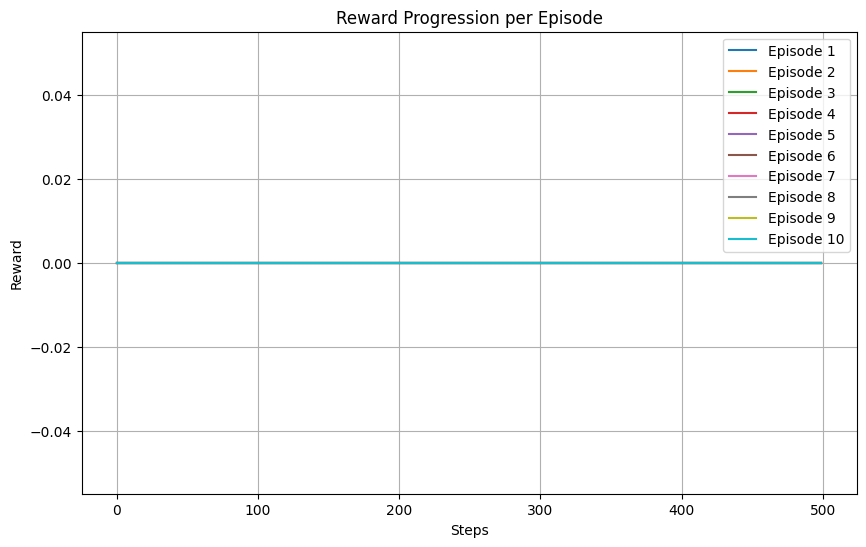

In [10]:
#報酬可視化

import gymnasium as gym
import gymnasium_robotics
import numpy as np
import matplotlib.pyplot as plt

# Gymnasium Robotics 環境の登録
gym.register_envs(gymnasium_robotics)

# AntMaze 環境を作成
env = gym.make("AntMaze_UMazeDense-v5", max_episode_steps=500)

# カスタム迷路
example_map = [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 1],
               [1, 0, 1, 0, 1],
               [1, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]]

env = gym.make("AntMaze_UMaze-v5", maze_map=example_map)

# 環境をリセットして初期状態を取得
options = {"goal_cell": [1, 3], "reset_cell": [1, 1]}
observation, info = env.reset(options=options)

# 環境パラメータ
num_episodes = 10  # エピソード数
max_steps_per_episode = 500  # 1エピソードあたりの最大ステップ数

# 報酬の推移を記録
all_rewards = []  # 各エピソードの報酬リスト

# 迷路探索
for episode in range(num_episodes):
    observation, info = env.reset(options=options)
    print(f"Episode {episode + 1} start.")
    episode_rewards = []  # このエピソードの報酬リスト

    for step in range(max_steps_per_episode):
        # ランダムなアクションを選択
        action = env.action_space.sample()

        # 環境で1ステップを実行
        observation, reward, terminated, truncated, info = env.step(action)

        # 報酬を記録
        episode_rewards.append(reward)

        # 観測と状態を表示
        print(f"Step {step + 1}:")
        print(f"  Reward: {reward}")

        # 目標地点に到達したか確認
        if info.get("success", False):
            print(f"  Success! The agent reached the goal in {step + 1} steps.")
            break

        # 終了条件を満たしたらループを終了
        if terminated or truncated:
            print(f"  Episode ended after {step + 1} steps.")
            break

    # エピソード終了後、報酬を保存
    all_rewards.append(episode_rewards)

print("Exploration finished.")
env.close()

# 報酬の可視化
plt.figure(figsize=(10, 6))
for i, rewards in enumerate(all_rewards):
    plt.plot(rewards, label=f"Episode {i + 1}")
plt.xlabel("Steps")
plt.ylabel("Reward")
plt.title("Reward Progression per Episode")
plt.legend()
plt.grid()
plt.show()

Episode 1: Total Reward = 0.031051702658365706
Episode 2: Total Reward = 0.047703865312305825
Episode 3: Total Reward = 0.025485021921299443
Episode 4: Total Reward = 0.07437063875203433
Episode 5: Total Reward = 0.08423874502493911
Episode 6: Total Reward = 0.050309941062563084
Episode 7: Total Reward = 0.024951455351594286
Episode 8: Total Reward = 0.06947680417519364
Episode 9: Total Reward = 0.021377351130633455
Episode 10: Total Reward = 0.0869515466368424


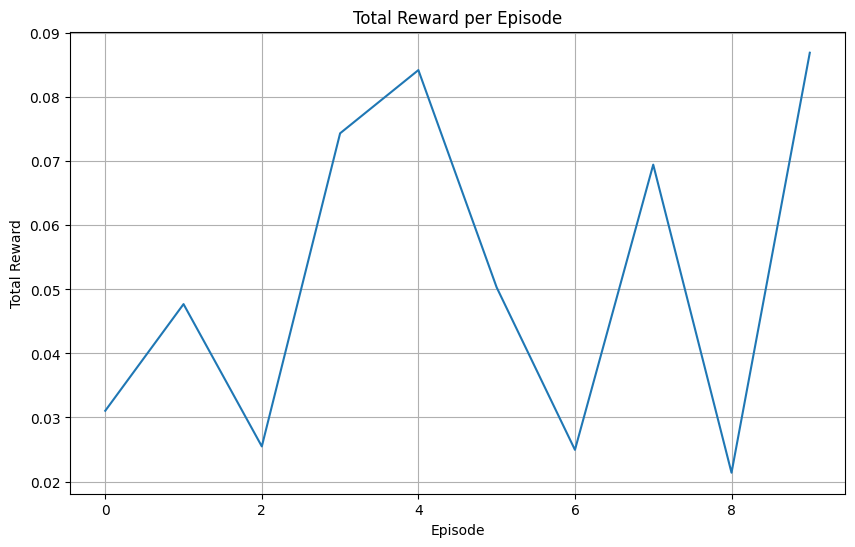

In [14]:
pip install gymnasium-robotics

import gymnasium as gym
import gymnasium_robotics
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Gymnasium Robotics 環境の登録
gym.register_envs(gymnasium_robotics)

# AntMaze 環境の作成 (連続報酬)
example_map = [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 1],
               [1, 0, 1, 0, 1],
               [1, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]]

env = gym.make("AntMaze_UMazeDense-v5", maze_map=example_map, max_episode_steps=500)

# ゴールと初期位置を指定
options = {"goal_cell": [1, 3], "reset_cell": [1, 1]}

# Q-learning のパラメータ
alpha = 0.1  # 学習率
gamma = 0.99  # 割引率
epsilon = 1.0  # ε-greedy の初期値
epsilon_decay = 0.995  # εの減衰率
min_epsilon = 0.1  # εの最小値
num_episodes = 10  # エピソード数
max_steps_per_episode = 100  # 各エピソードの最大ステップ数

# アクション空間の離散化
num_action_bins = 5  # アクションを分割する数
action_bins = [np.linspace(low, high, num_action_bins) for low, high in zip(env.action_space.low, env.action_space.high)]

# 状態-アクションの Q テーブル
q_table = defaultdict(lambda: np.zeros((num_action_bins,) * env.action_space.shape[0]))

# ε-greedy ポリシーでアクションを選択
def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        # ランダムな離散アクションを選択
        return tuple(np.random.randint(0, num_action_bins, size=env.action_space.shape[0]))
    return np.unravel_index(np.argmax(q_table[state]), q_table[state].shape)

# 離散化されたアクションを連続値に変換
def map_discrete_action_to_continuous(action):
    return np.array([action_bins[i][idx] for i, idx in enumerate(action)])

# 状態のディスクリタイズ
def discretize_state(state):
    # 必要に応じて離散化 (例: 0.1単位で丸める)
    return tuple(np.round(state, decimals=1))

# 学習ループ
all_rewards = []
for episode in range(num_episodes):
    state, info = env.reset(options=options)
    state = discretize_state(state["observation"])  # 状態を離散化
    total_reward = 0

    for step in range(max_steps_per_episode):
        # 離散アクションを選択
        discrete_action = choose_action(state, epsilon)
        # 離散アクションを連続値に変換
        continuous_action = map_discrete_action_to_continuous(discrete_action)

        # アクションを実行
        next_state, reward, terminated, truncated, info = env.step(continuous_action)
        next_state = discretize_state(next_state["observation"])  # 次状態を離散化

        # Q値の更新
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][np.unravel_index(best_next_action, q_table[next_state].shape)]
        td_error = td_target - q_table[state][discrete_action]
        q_table[state][discrete_action] += alpha * td_error

        state = next_state
        total_reward += reward

        # エピソード終了条件
        if terminated or truncated:
            break

    # εの減衰
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # 報酬を記録
    all_rewards.append(total_reward)

    print(f"Episode {episode + 1}: Total Reward = {total_reward}")

# 環境を閉じる
env.close()

# 報酬の可視化
plt.figure(figsize=(10, 6))
plt.plot(all_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward per Episode")
plt.grid()
plt.show()